In [21]:


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np

import matplotlib
from matplotlib import pyplot
import data_generator

import sys



In [22]:
print(f'Using python version: {sys.version}\n');
print(f'Using TensorFlow version: {tf.version.VERSION}');
print(f'Using numpy version: {np.version.version}');


Using python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]

Using TensorFlow version: 2.5.0
Using numpy version: 1.19.5


In [23]:
# load in the data 

full_dataset = np.load("ml_dataset.npy");

In [24]:
# split up the data into the x and y halves

x_set = full_dataset[0];
y_set = full_dataset[1];

In [25]:
# split the data into training and testing sets


half = int(len(x_set)/2);

print(f'half: {half}');
x_train = x_set[0:half];
x_test = x_set[half:];

y_train = y_set[0:half];
y_test = y_set[half:];



half: 50


In [26]:
# print some data diagnostics to ensure we correctly obtained data sets

print(f"x_set shape: {x_set.shape}");
print(f"y_set shape: {y_set.shape}");


training_point_number = x_set.shape[1];
print(f"number of points in each graph set: {training_point_number}");


print("number of x training data sets:");
print(len(x_train[0:]));


print("number of y training data sets:");
print(len(y_train[0:]));

assert(len(x_train) == len(y_train));
assert(len(x_test) == len(y_test));
assert(x_set.shape == y_set.shape);

print(f"\nNumber of training graph-solution sets: {len(x_train)}")


print(f"Number of testing graph-solution sets: {len(x_test)}")



print(f"\nDataset shape: {x_set.shape}")



x_set shape: (100, 500)
y_set shape: (100, 500)
number of points in each graph set: 500
number of x training data sets:
50
number of y training data sets:
50

Number of training graph-solution sets: 50
Number of testing graph-solution sets: 50

Dataset shape: (100, 500)


In [27]:
# reshape the x data into a column of 1 element rows for the LSTM


x_train = x_train.reshape(x_train.shape[0],training_point_number,1);
x_test = x_test.reshape(x_test.shape[0],training_point_number,1);

print(x_train.shape)

(50, 500, 1)


In [28]:
#build the model by stacking layers


model = tf.keras.models.Sequential()

model.add(LSTM(training_point_number));


model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));

model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));
model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));
model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));

model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));

model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));

model.add(Dense(training_point_number*2,activation='relu'));
model.add(Dropout(0.2));

model.add(Dense(training_point_number,activation='softmax'));


print("model built");


model built


In [29]:
#print(y_train[0])

In [30]:
# get the predictions for the second datapoint
predictions = model(x_train)

# print the raw predictions for that datapoint. Note that these are "logits" or "log-odds" scores, which is related to the probability, 
# and also is the inverse of the sigmoid function
print("logits prediction: ");
print(predictions[0]);

# we can use the softmax function to convert these logits to probabilities for each preciction class
#print("odds prediction: ");
#print(tf.nn.softmax(predictions).numpy()[0]);


print(f'shape: {predictions.shape}');


logits prediction: 
tf.Tensor(
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0

In [31]:
# get the loss function as a MeanSquaredError loss from tf.keras.losses. 
loss_fn = tf.keras.losses.MeanSquaredError();


print("loss:");
print(loss_fn(y_train[0],predictions[0]).numpy());

loss:
nan


In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4);

model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy']);


In [33]:
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test), batch_size=10);

Epoch 1/5
5/5 [==============================] - 21s 4s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 18s 4s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 18s 4s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 19s 4s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 18s 4s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000


In [34]:

print(model.summary());

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 500)               1004000   
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dropout_14 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1000)             

In [35]:
predictions = model(x_train);

(50, 500)
(500,)


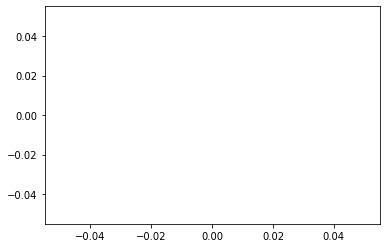

In [38]:
first_graph = predictions[25];
print(predictions.shape);

x = np.linspace(0,500,500);
print(x.shape)

pyplot.plot(x, first_graph);
pyplot.plot(x,y_set[25])